# Time series denoising

This notebook is the Python version of the exercises of [Signal processing problems](https://www.udemy.com/course/signal-processing/). 

## Running mean time series

A running mean time series is a filter that can be applied to smooth a given signal. For this case, a given point $y_{t}$ is equal to the average of its neighbour points. This can be expressed by:

$y_{1} = \dfrac{1}{2k+1} \sum_{i=t-k}^{t+k}x_{i}$.

This filter smoothes the sharp edges and the larger the value of k, the smoother the signal becomes. Unfortunately, this produces *edge effects* for the first and last signal points. 

It's generally appropriate when the noise is evenly (positively and negatively) distributed.

In [28]:
## IMPORTING THE VARIABLES
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [31]:
## SETTING UP VARIABLES
sampling_rate = 1000
time = np.arange(0, 3, 1/sampling_rate) # Step size is 1/sampling_rate (time interval between samples)
n = len(time)
p = 15  # Poles for random interpolation
noiseamp = 5  # Noise level in standard deviations

## GENERATING THE SIGNAL 

# Creates an array of p random variables, between 0 and 1, scaling by 30
# Represents random amplitude values (y-axis values)
random_ampl_values = np.random.rand(p) * 30

# Generates p equally spaced values from 0 to p-1
# Represents the time/index points (x-axis values)
interp_func = interp1d(np.linspace(0, p-1, p), random_ampl_values, kind='linear')

# Generates n points to match teh samples of time vector
# Uses linear interpolation to fill in these values
ampl = interp_func(np.linspace(0, p-1, n))

# Generates n samples from a std normal distribution and scales the noise
noise = noiseamp * np.random.randn(n)

# Our signal is the sum of the amplitude and the noise
signal = ampl + noise

# Initializing the filtered signal that has the same shape and data type of signal
filtered_signal = np.zeros_like(signal)


In [22]:
## GENERATING THE FILTER

# K represents half the window size around each central point
step_size_k = 20
filter_window = 2 * step_size_k + 1

# Building the filter
for i in range(step_size_k, n - step_size_k - 1):
    # The filtered signal at each point is the mean of the signal in the window around that point
    filtered_signal[i] = np.mean(signal[i - step_size_k:i + step_size_k + 1])

# Window size in ms
# The filter window over SR (number of samples per second) is the duration in seconds 
window_size_ms = 1000 * (filter_window / sampling_rate)

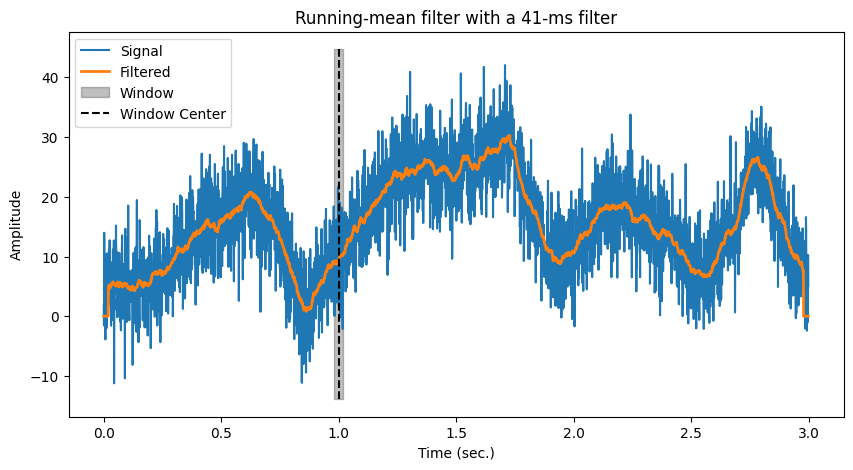

In [27]:
## GENERATING THE PLOT

# Plot the noisy and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(time, signal, label='Signal')
plt.plot(time, filtered_signal, linewidth=2, label='Filtered Signal')

# Draw a patch to indicate the window size
tidx = np.argmin(np.abs(time - 1))
ylim = plt.ylim()
plt.fill_between(time[tidx-step_size_k:tidx+step_size_k+1], ylim[0], ylim[1], color='k', alpha=0.25)
plt.plot([time[tidx], time[tidx]], ylim, 'k--')

# Labeling the plot
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title(f'Running-mean filter with a {int(window_size_ms)}-ms filter')
plt.legend(['Signal', 'Filtered', 'Window', 'Window Center'])
plt.show()

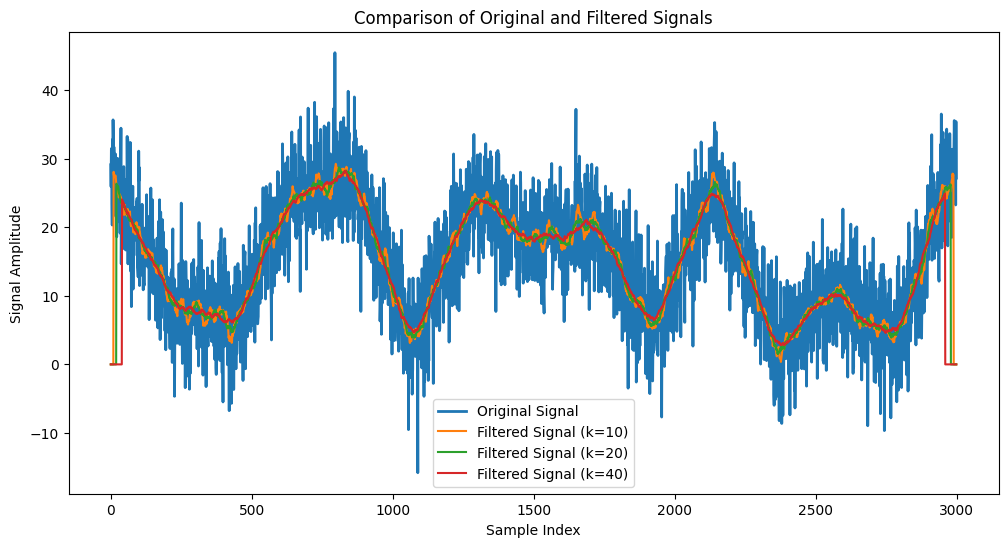

In [32]:
## EXTRA
# Let's make a comparison between different values of k for this filter

def apply_filter(signal, step_size_k):
    filtered_signal = np.zeros_like(signal)
    filter_window = 2 * step_size_k + 1
    for i in range(step_size_k, len(signal) - step_size_k):
        filtered_signal[i] = np.mean(signal[i - step_size_k:i + step_size_k + 1])
    return filtered_signal

# Values of step_size_k to compare
step_sizes = [10, 20, 40]

# Calculate filtered signals
filtered_signals = [apply_filter(signal, k) for k in step_sizes]

# Plot original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original Signal', linewidth=2)

for k, filtered_signal in zip(step_sizes, filtered_signals):
    plt.plot(filtered_signal, label=f'Filtered Signal (k={k})')

plt.xlabel('Sample Index')
plt.ylabel('Signal Amplitude')
plt.title('Comparison of Original and Filtered Signals')
plt.legend()
plt.show()